In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# load the data
df = pd.read_csv('Diwali Sales Data.csv', encoding='unicode_escape')

In [3]:
# drop unrelated/blank columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [4]:
# drop null values
df.dropna(inplace=True)

In [5]:
# change data type
df['Amount'] = df['Amount'].astype('int')

In [6]:
# rename column
df.rename(columns={'Marital_Status': 'Shaadi'}, inplace=True)

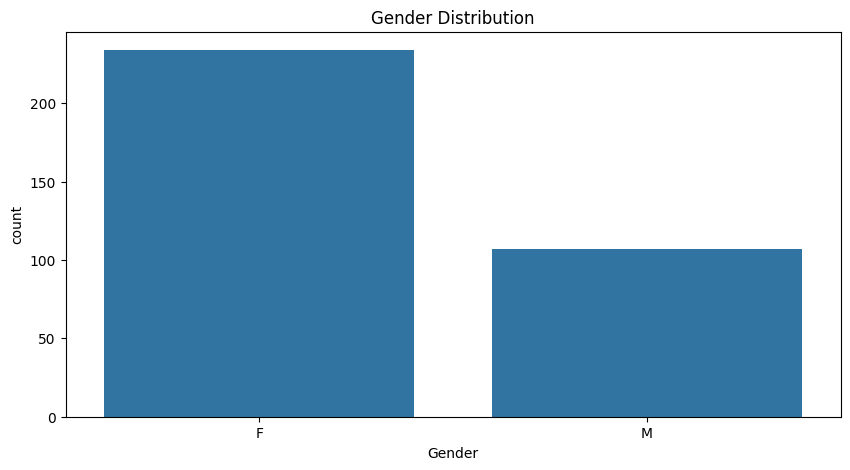

In [7]:
# Exploratory Data Analysis

# Gender
plt.figure(figsize=(10, 5))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

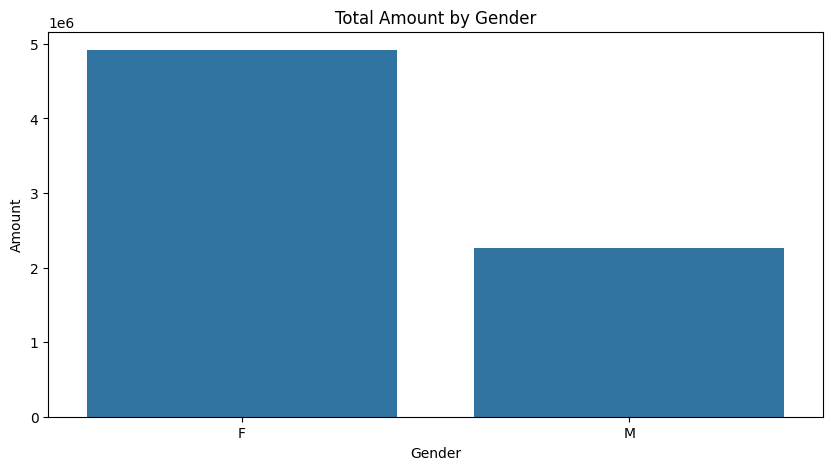

In [8]:
# Total amount vs Gender
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x='Gender', y='Amount', data=sales_gen)
plt.title('Total Amount by Gender')
plt.show()

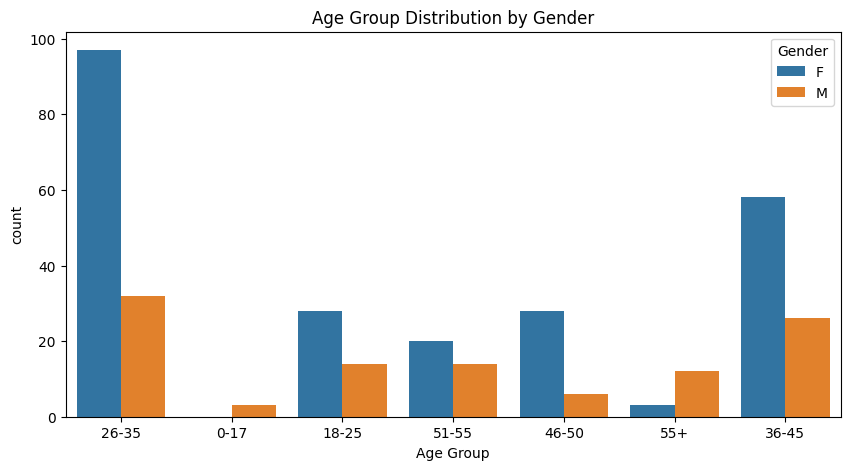

In [ ]:
# Age
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Age Group', hue='Gender')
plt.title('Age Group Distribution by Gender')
plt.show()

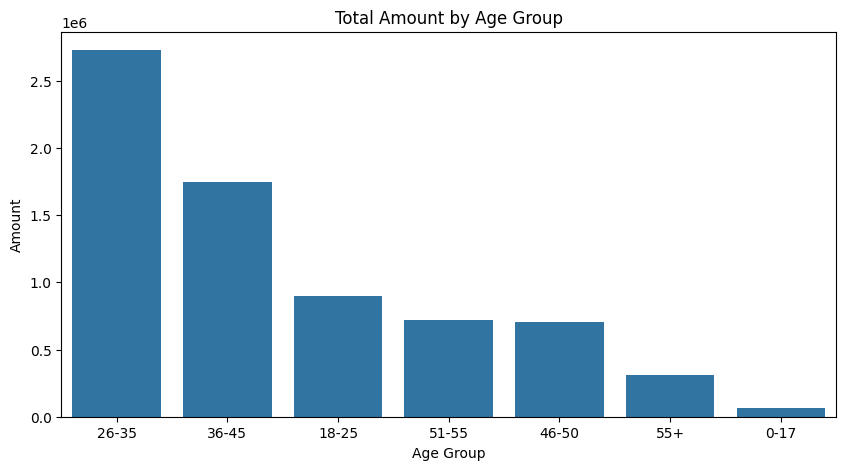

In [ ]:
# Total Amount vs Age Group
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x='Age Group', y='Amount', data=sales_age)
plt.title('Total Amount by Age Group')
plt.show()

In [ ]:
# State
# Total number of orders from top 10 states
sales_state_orders = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)

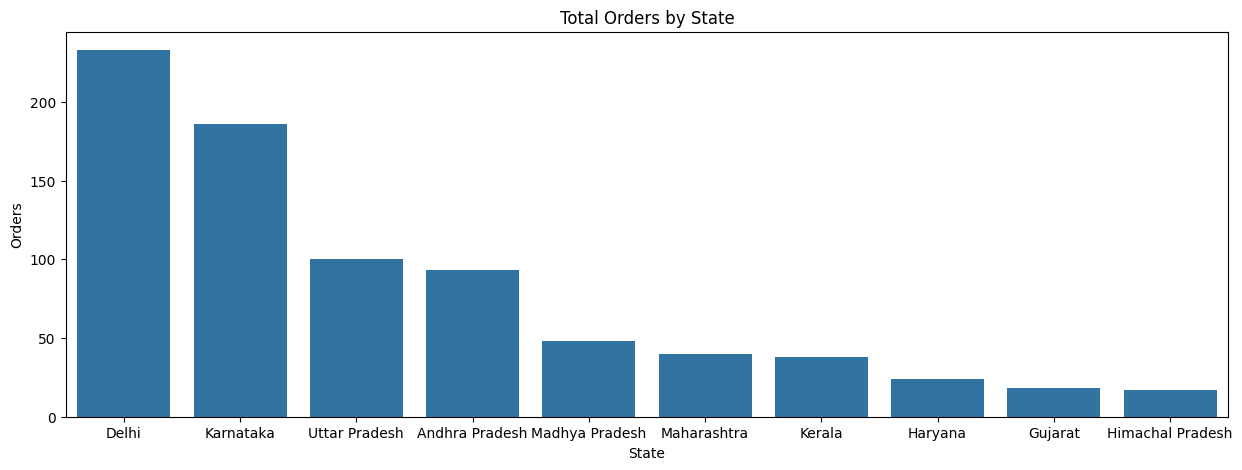

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(data=sales_state_orders, x='State', y='Orders')
plt.title('Total Orders by State')
plt.show()

In [ ]:
# Total amount/sales from top 10 states
sales_state_amount = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

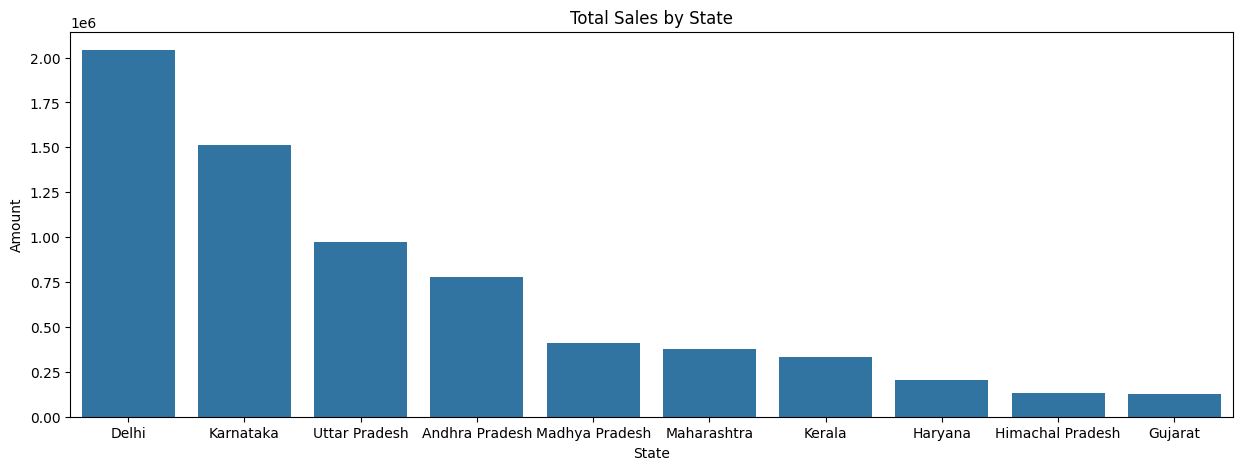

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(data=sales_state_amount, x='State', y='Amount')
plt.title('Total Sales by State')
plt.show()

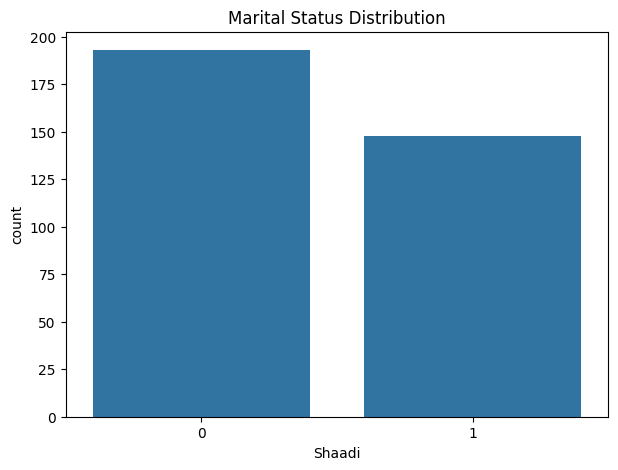

In [ ]:
# Marital Status
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Shaadi')
plt.title('Marital Status Distribution')
plt.show()

In [ ]:
# Total amount vs Marital Status and Gender
sales_marital_gender = df.groupby(['Shaadi', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

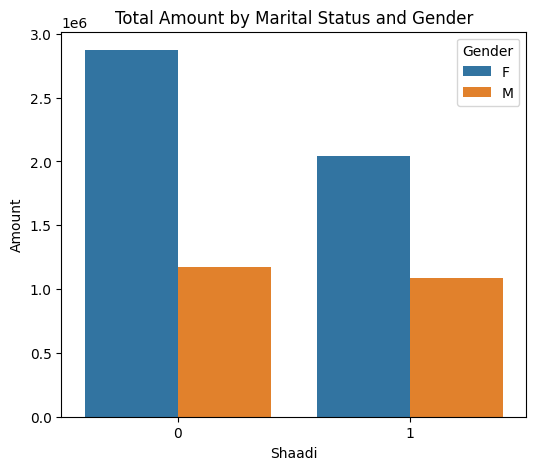

In [ ]:
plt.figure(figsize=(6, 5))
sns.barplot(data=sales_marital_gender, x='Shaadi', y='Amount', hue='Gender')
plt.title('Total Amount by Marital Status and Gender')
plt.show()

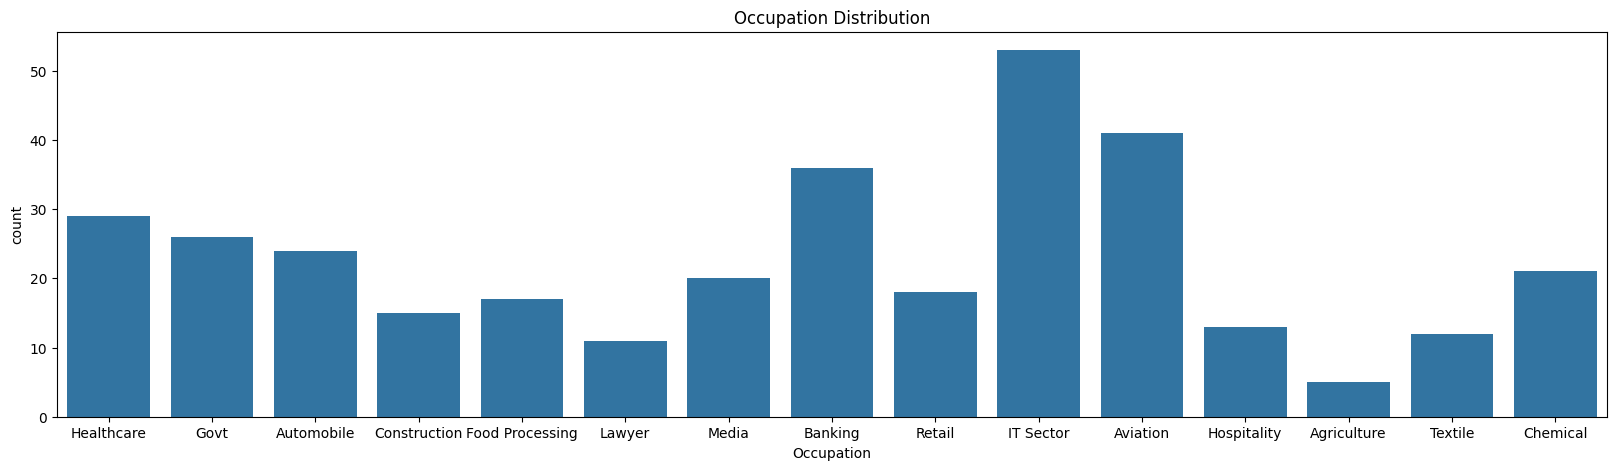

In [ ]:
# Occupation
plt.figure(figsize=(20, 5))
sns.countplot(data=df, x='Occupation')
plt.title('Occupation Distribution')
plt.show()

In [ ]:
# Total amount by Occupation
sales_occupation = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

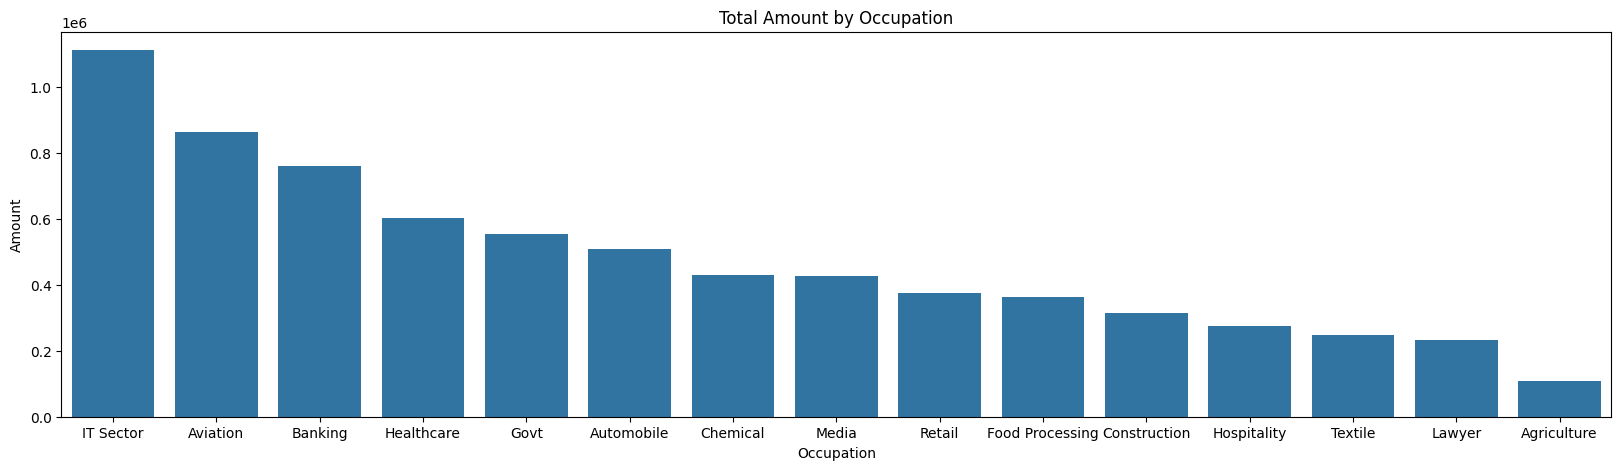

In [ ]:
plt.figure(figsize=(20, 5))
sns.barplot(data=sales_occupation, x='Occupation', y='Amount')
plt.title('Total Amount by Occupation')
plt.show()

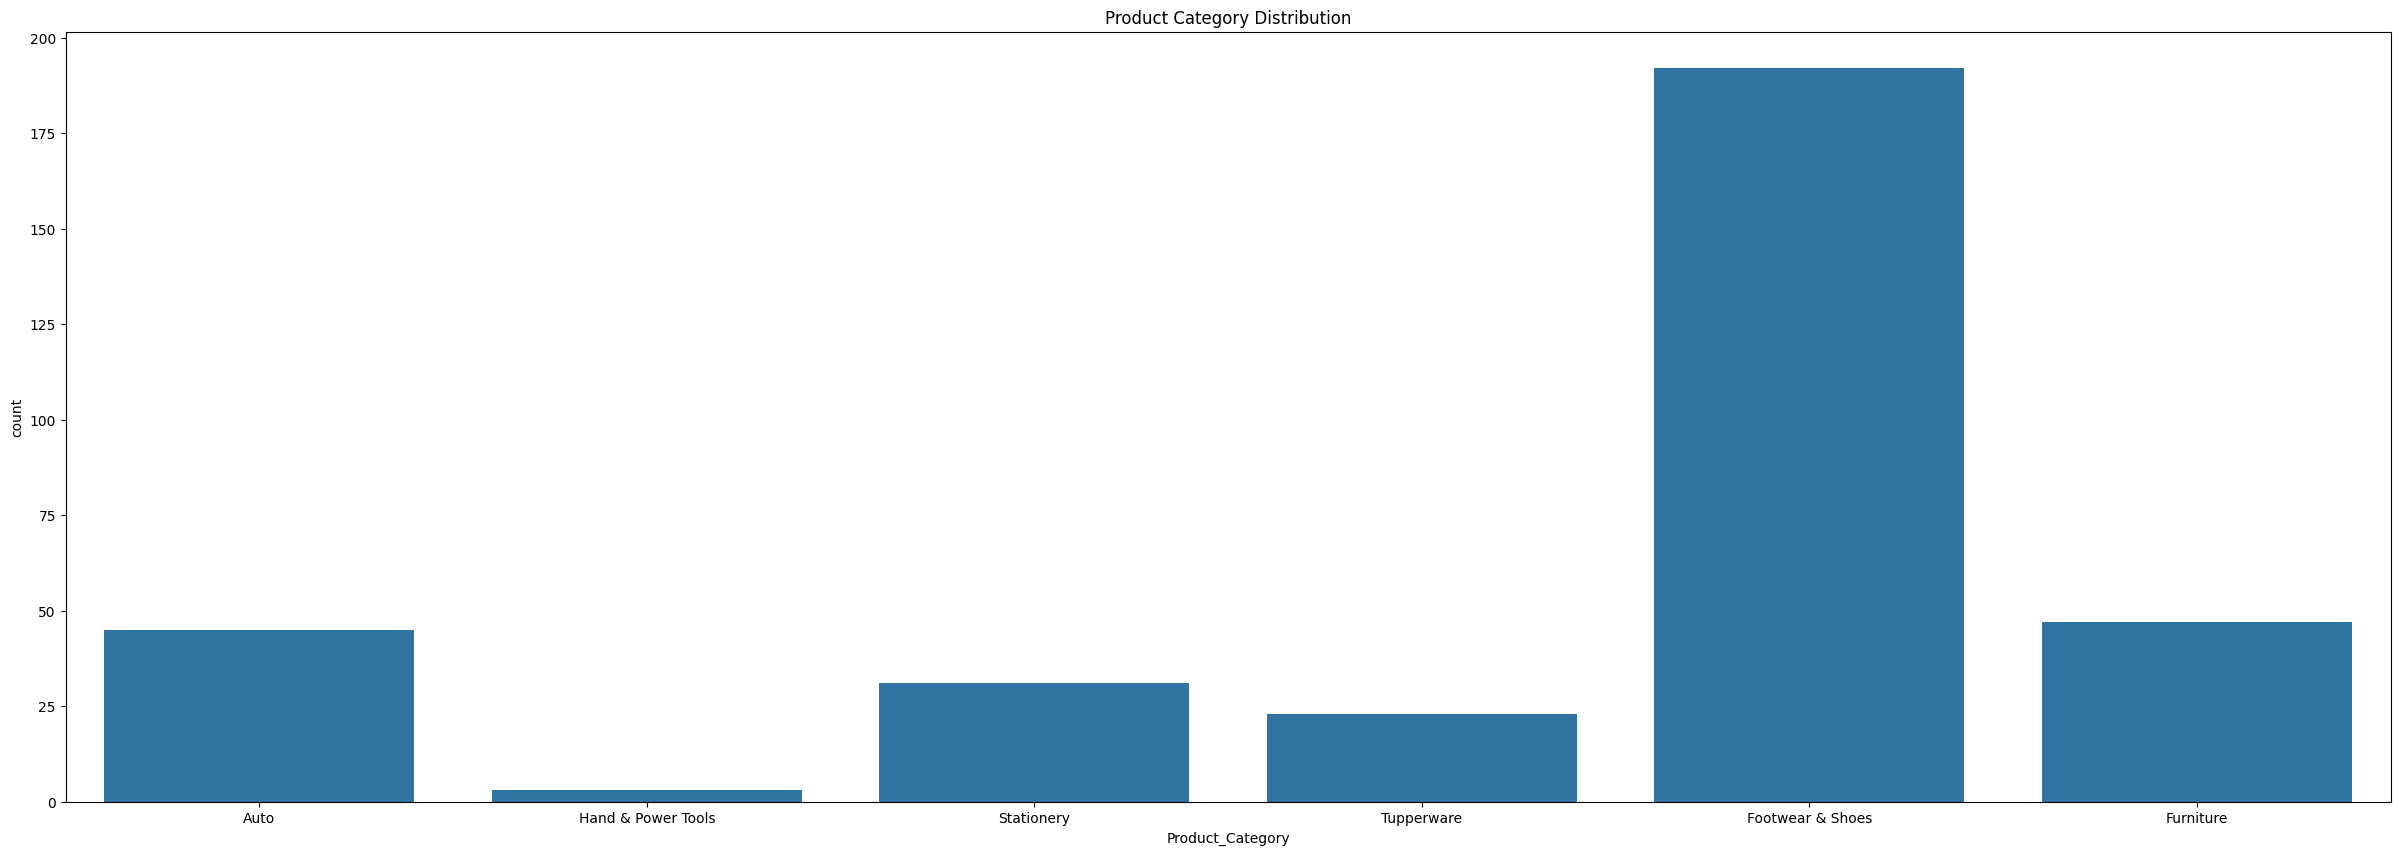

In [ ]:
# Product Category
plt.figure(figsize=(30, 10))
sns.countplot(data=df, x='Product_Category')
plt.title('Product Category Distribution')
plt.show()

In [ ]:
# Total amount by Product Category
sales_category = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

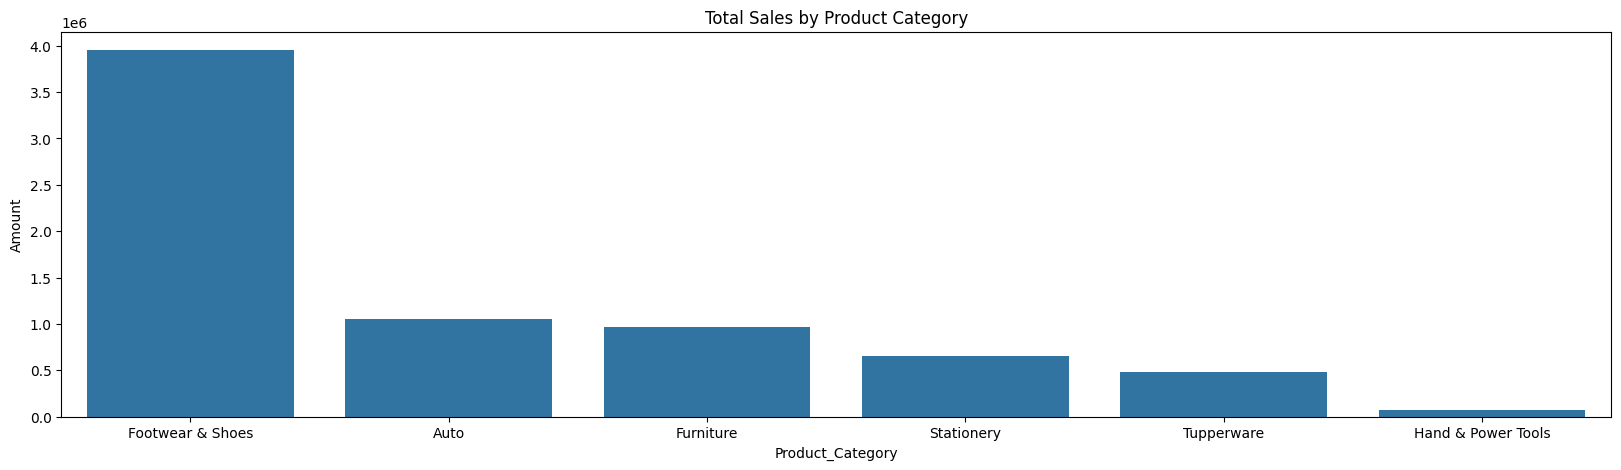

In [ ]:
plt.figure(figsize=(20, 5))
sns.barplot(data=sales_category, x='Product_Category', y='Amount')
plt.title('Total Sales by Product Category')
plt.show()


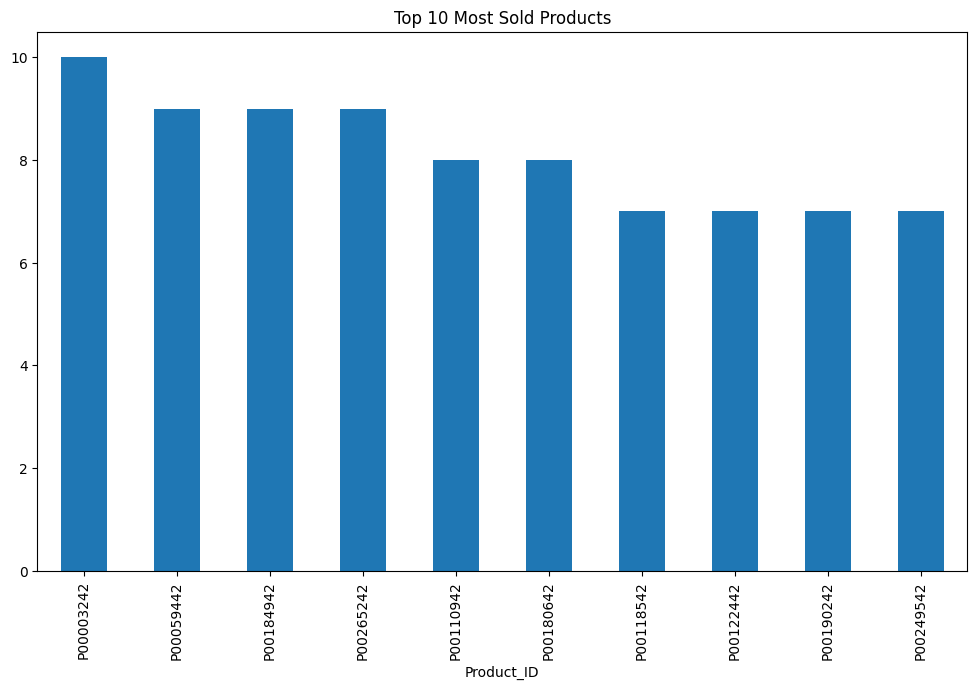

In [ ]:
# Top 10 most sold products
plt.figure(figsize=(12, 7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')
plt.title('Top 10 Most Sold Products')
plt.show()

In [ ]:
# Linear Regression example (predicting sales amount based on orders)
X = df[['Orders']]  # independent variable
y = df['Amount']  # dependent variable


In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Creating linear regression model
model = LinearRegression()
print(model)

LinearRegression()


In [ ]:
# Fitting the model
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Making predictions
y_pred = model.predict(X_test)

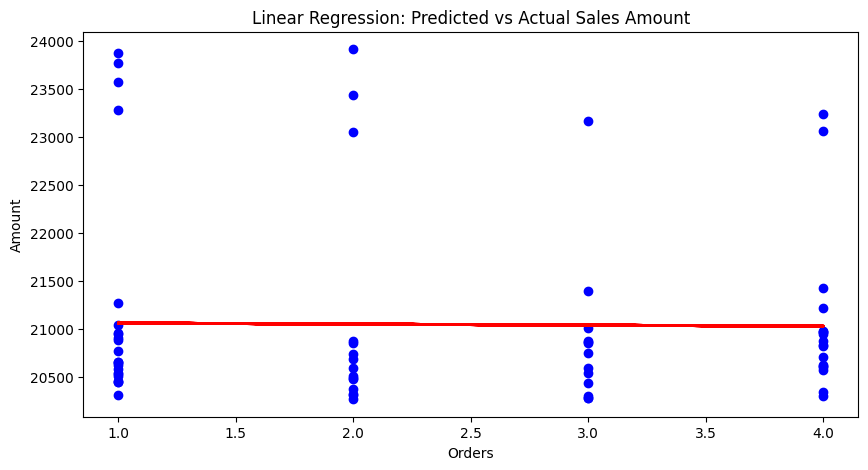

In [ ]:
# Plotting the results
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Linear Regression: Predicted vs Actual Sales Amount')
plt.xlabel('Orders')
plt.ylabel('Amount')
plt.show()